In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
Normal = df[df['Class']==0]
Fraud = df[df['Class']==1]

In [10]:
Fraud.shape

(492, 31)

In [11]:
print(type(Fraud))

<class 'pandas.core.frame.DataFrame'>


In [12]:
Normal.shape

(284315, 31)

In [13]:
df.groupby('Class').min()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0
1,406.0,-30.55238,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.0


In [14]:
new_df = pd.concat([Normal, Fraud], axis=0) # different dataset(Normal, Fraud) together

In [15]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [16]:
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [17]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [19]:
new_df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
89515.0      1
89516.0      1
89519.0      1
89520.0      1
169142.0     1
Name: Time, Length: 124592, dtype: int64

# Using Normalization (Scale down the values of the features from 0 to 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:

scaler = MinMaxScaler()



In [22]:
X_scaled = scaler.fit_transform(X)

In [23]:
# Convert back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
# Combine the scaled data with the 'Class' column
new_df_scaled = pd.concat([X_scaled, y], axis=1)

In [25]:
new_df_scaled # Convert Back to DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,...,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,0
284803,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,...,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,0
284804,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,...,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,0
284805,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,...,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,0


In [26]:
new_df_scaled['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the VarianceThreshold object with a specified threshold
selector = VarianceThreshold(threshold=0)

# Fit and transform the training data to remove low-variance features
X_train_selected = selector.fit_transform(X_train)

X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_columns)

# Print the number of selected columns
print(len(selected_columns))

30


In [29]:
selected_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [30]:
for i in selected_columns:
    print(i)

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


In [31]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_selected_df, y_train)
print(mutual_info)

[0.00199149 0.0021399  0.00335263 0.00502618 0.00506108 0.00242728
 0.00239942 0.00405144 0.00196548 0.0044129  0.00778969 0.00703867
 0.00781052 0.00042277 0.0082616  0.00039475 0.00629052 0.00845717
 0.00439289 0.00155562 0.00134279 0.00258927 0.00043772 0.00097026
 0.00070448 0.0006341  0.00052932 0.00255719 0.00190309 0.00145226]


In [32]:
mutual_info = pd.Series(mutual_info, index=selected_columns)
mutual_info.index = X_train_selected_df.columns
mutual_info_series = mutual_info.sort_values(ascending = False)
print(mutual_info_series)

V17       0.008457
V14       0.008262
V12       0.007811
V10       0.007790
V11       0.007039
V16       0.006291
V4        0.005061
V3        0.005026
V9        0.004413
V18       0.004393
V7        0.004051
V2        0.003353
V21       0.002589
V27       0.002557
V5        0.002427
V6        0.002399
V1        0.002140
Time      0.001991
V8        0.001965
V28       0.001903
V19       0.001556
Amount    0.001452
V20       0.001343
V23       0.000970
V24       0.000704
V25       0.000634
V26       0.000529
V22       0.000438
V13       0.000423
V15       0.000395
dtype: float64


In [33]:
top_features = mutual_info_series.head(10).index

In [34]:
X_train_top_features = X_train_selected_df[top_features]
X_test_top_features = X_test_selected_df[top_features]


In [35]:
print("Top features based on mutual information:")
for feature in top_features:
    print(feature)


Top features based on mutual information:
V17
V14
V12
V10
V11
V16
V4
V3
V9
V18


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:,1]

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.90      0.55      0.68       130

    accuracy                           1.00     85443
   macro avg       0.95      0.77      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

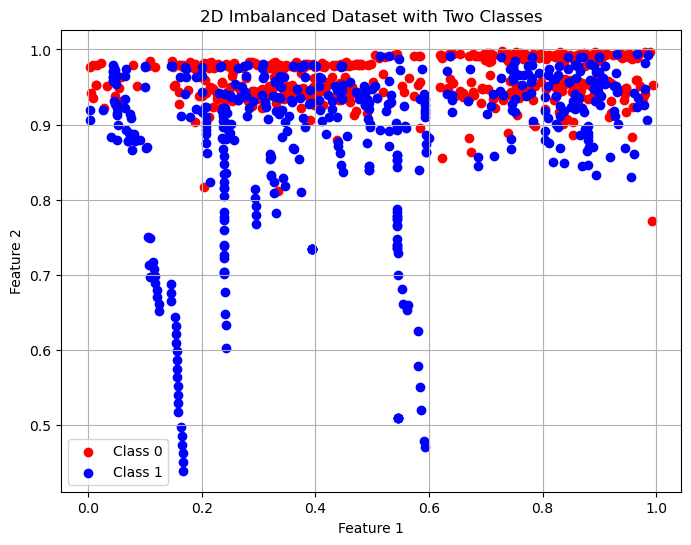

In [40]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# Visualize the resampled data
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0].iloc[:, 0], X_resampled[y_resampled == 0].iloc[:, 1], color='red', label='Class 0')
plt.scatter(X_resampled[y_resampled == 1].iloc[:, 0], X_resampled[y_resampled == 1].iloc[:, 1], color='blue', label='Class 1')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
y_resampled.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [46]:
X_resampled.value_counts()

Time      V1        V2        V3        V4        V5        V6        V7        V8        V9        V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28       Amount  
0.394735  0.734167  0.902169  0.665745  0.399118  0.733395  0.320932  0.151123  0.384700  0.449292  0.404188  0.547340  0.530412  0.300524  0.340997  0.319427  0.251814  0.549584  0.436697  0.567342  0.543073  1.000000  0.095452  0.744197  0.296071  0.592681  0.407664  0.439944  0.332187  0.000039    6
0.546102  0.508809  0.941331  0.314484  0.646644  0.645264  0.250674  0.075298  0.662682  0.136811  0.049679  0.548124  0.304967  0.393852  0.514040  0.156892  0.232787  0.369025  0.274948  0.518964  0.610209  0.420334  0.671482  0.678748  0.416573  0.536475  0.267562  0.282444  0.286238  0.000039    4
0.543306  0.740266  0.846487  0.482317  0.582882  0.687792  0.211332  0.179941  0.874763  0.3

In [43]:
print(type(X_resampled))

<class 'pandas.core.frame.DataFrame'>


In [44]:
print(X_train.shape,'\n', y_train.shape)
print(X_resampled.shape)

(199364, 30) 
 (199364,)
(984, 30)


In [45]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_resampled).value_counts())

0    199002
1       362
Name: Class, dtype: int64
0    492
1    492
Name: Class, dtype: int64


In [47]:
# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Should I do the train_test_split here?

# Initialize and fit the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.30      0.89      0.45       130

    accuracy                           1.00     85443
   macro avg       0.65      0.94      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# def plot_decision_boundaries(X, y, model, plot_step=0.02, cmap='viridis'):
#     x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
#     y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))
    
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    
#     plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
#     plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=20, cmap=cmap)
#     plt.title('Decision Boundary')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()

# # Plot decision boundaries for the logistic regression model
# plot_decision_boundaries(X_resampled, y_resampled, classifier)

In [48]:
from imblearn.over_sampling import RandomOverSampler

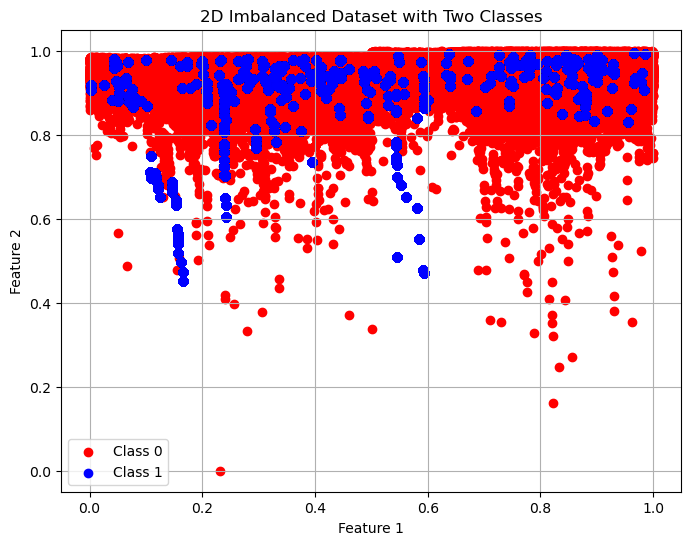

In [49]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_ros[y_ros == 0].iloc[:, 0], X_ros[y_ros == 0].iloc[:, 1], color='red', label='Class 0')
plt.scatter(X_ros[y_ros == 1].iloc[:, 0], X_ros[y_ros == 1].iloc[:, 1], color='blue', label='Class 1')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
print(X_ros.shape)

(398004, 30)


In [51]:
print(X_train.shape,'\n',y_train.shape)

(199364, 30) 
 (199364,)


In [53]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_ros).value_counts())

0    199002
1       362
Name: Class, dtype: int64
0    199002
1    199002
Name: Class, dtype: int64
